### Import the packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score,mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

### Read the dataset using pandas

In [3]:
data = pd.read_csv("car.csv")
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


### Basic EDA

In [4]:
# Check the shape of data
data.shape

(301, 9)

In [5]:
# Check column names of the data
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [6]:
# Check for missing values 
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [7]:
# Check for the datatypes and other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Check the statistics of data
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [9]:
# lets see the Correlation between the features
print(data.corr())

                   Year  Present_Price  Kms_Driven     Owner  Selling_Price
Year           1.000000      -0.047584   -0.524342 -0.182104       0.236141
Present_Price -0.047584       1.000000    0.203647  0.008057       0.878983
Kms_Driven    -0.524342       0.203647    1.000000  0.089216       0.029187
Owner         -0.182104       0.008057    0.089216  1.000000      -0.088344
Selling_Price  0.236141       0.878983    0.029187 -0.088344       1.000000


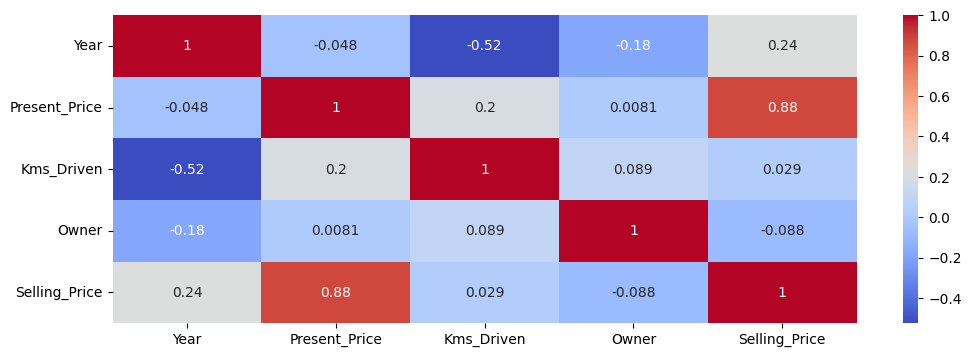

In [10]:
# Plot the heatmap
plt.figure(figsize=(12 , 4))
correlations = data.corr()
sns.heatmap(correlations , cmap="coolwarm" , annot=True)
plt.show()

### Basic preprocessing

In [11]:
# Lets encode the features using Label Encoding
le = LabelEncoder()
data["Fuel_Type"] = le.fit_transform(data.Fuel_Type.values)
data["Transmission"] = le.fit_transform(data.Transmission.values)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [12]:
#Petrol=2 , Diesel=1 , CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [13]:
#Manual=1 , Automatic=0
data.Transmission.unique()


array([1, 0])

In [14]:
#First=0 , Second=1 , Fourth=3
data.Owner.unique()


array([0, 1, 3], dtype=int64)

In [15]:
#Target column is Selling Price
predict = "Selling_Price"
data = data[[ 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
        'Transmission', 'Owner', 'Selling_Price' ]]

In [16]:
# Split dataset into input (other than selling price) and output (Selling Price)
x = np.array(data.drop([predict],1))
y = np.array(data[predict])

In [17]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Model building

In [18]:
#Train all 7 models on x_train and y_train
lr_model = LinearRegression().fit(x_train,y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model = RandomForestRegressor().fit(x_train,y_train)
gbm_model = GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model = LGBMRegressor().fit(x_train,y_train)
xgb_model = XGBRegressor().fit(x_train,y_train)
catb_model = CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.032678
0:	learn: 5.1791199	total: 129ms	remaining: 2m 8s
1:	learn: 5.0894602	total: 134ms	remaining: 1m 6s
2:	learn: 4.9929682	total: 138ms	remaining: 46s
3:	learn: 4.9225791	total: 140ms	remaining: 34.9s
4:	learn: 4.8391572	total: 143ms	remaining: 28.5s
5:	learn: 4.7532777	total: 147ms	remaining: 24.4s
6:	learn: 4.6755043	total: 151ms	remaining: 21.4s
7:	learn: 4.5907883	total: 156ms	remaining: 19.3s
8:	learn: 4.5072526	total: 160ms	remaining: 17.6s
9:	learn: 4.4313701	total: 164ms	remaining: 16.2s
10:	learn: 4.3538847	total: 168ms	remaining: 15.1s
11:	learn: 4.2809899	total: 173ms	remaining: 14.2s
12:	learn: 4.2010989	total: 177ms	remaining: 13.4s
13:	learn: 4.1377229	total: 183ms	remaining: 12.9s
14:	learn: 4.0613546	total: 187ms	remaining: 12.3s
15:	learn: 3.9960586	total: 190ms	remaining: 11.7s
16:	learn: 3.9390428	total: 194ms	remaining: 11.2s
17:	learn: 3.8867146	total: 199ms	remaining: 10.8s
18:	learn: 3.8196972	total: 201ms	remaining: 10.4s
19:	learn: 3.

### Model Evaluation

In [19]:
#define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction = model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squred Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [20]:
#Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lr_model,x_test,y_test))
print("\n")
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print("\n")
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print("\n")
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print("\n")
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print("\n")
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print("\n")
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))
print("\n")

LR_Model:
Mean Absolute Error: 1.1214421542355295
Mean Absolute Percentage Error: 1.2230508306275125
Mean Squred Error: 2.2610130478144996
Root Mean Squared Error: 1.5036665347790712
R2 Score: 0.873215577519269
None


DT_Model:
Mean Absolute Error: 0.8637704918032787
Mean Absolute Percentage Error: 0.21627410676329034
Mean Squred Error: 1.7420147540983604
Root Mean Squared Error: 1.3198540654551019
R2 Score: 0.9023179743412992
None


RF_Model:
Mean Absolute Error: 0.6187934426229504
Mean Absolute Percentage Error: 0.17226141632787476
Mean Squred Error: 0.9216172599999994
Root Mean Squared Error: 0.9600089895412436
R2 Score: 0.9483210801590385
None


GBM_Model:
Mean Absolute Error: 0.5202301882300696
Mean Absolute Percentage Error: 0.17454266343225142
Mean Squred Error: 0.6024851802697113
Root Mean Squared Error: 0.7761991885268312
R2 Score: 0.9662161455868071
None


LGBM_Model:
Mean Absolute Error: 0.8509257515608284
Mean Absolute Percentage Error: 0.29667691899266735
Mean Squred Error

### Prediction

In [21]:
# From above result, as r2 is comparatively high in CatBoost Model

predictions = catb_model.predict(x_test)
predictions

array([ 7.05059774, 11.08952395, 12.28511156,  0.66802292,  0.99697163,
        0.84596769, 17.79206966,  1.60314133,  7.46779292,  1.50299572,
        2.34854151,  3.44799639,  3.91555105,  5.08950003,  2.6425923 ,
        8.73023532,  3.37413112,  3.26657412,  7.76624947,  3.26307566,
        4.67115352,  0.4624313 ,  0.52387894,  4.03239025,  4.09138271,
        9.50026226,  0.33188533,  6.41442374,  0.71627567,  4.8211521 ,
        8.87931193,  1.41329903,  9.89179656,  4.35577046,  5.325431  ,
        0.72867507,  0.67849634,  6.10235522,  4.22166116,  6.2634976 ,
        6.61748839,  1.32924797,  4.15019437,  0.48938463,  7.77570602,
        2.46763087,  0.82472679, -0.03041065,  3.38009855,  6.99345218,
        3.88919201,  7.00682645,  1.49872348,  2.92758925,  4.04910685,
       22.55054665,  9.08410924,  0.36638253,  0.63368165,  6.24190546,
        2.78326192])

In [22]:
# Let's do the prediction new unknown data
input=np.array([[2016,30000,6.87,1,1,0,0]])
price = catb_model.predict(input)
print(price.round(1)[0],"in Lakhs")

24.6 in Lakhs


### Saving Model

In [23]:
# Save the model in pickle file
import pickle
pickle.dump(catb_model,open("car_price_predictor_model.pkl","wb"))